### Componentes Conectados
Existem duas funções no OpenCV que podem ser usadas para localizar componentes conectados ***cv2.connectedComponents*** e ***cv2.connectedComponentsWithStats***. Ambos usam os mesmos argumentos: a imagem binária cujos componentes devem ser encontrados, o tipo de conectividade e profundidade da imagem de saída.

***cv2.connectedComponents*** é mais simples e retorna uma tupla de números de componentes e uma imagem com rótulos para componentes (labelmap). Além das saídas da função anterior. ***cv2.connectedComponentsWithStats*** também retorna ***estatísticas*** sobre cada componente e as localizações dos centróides dos componentes.



***Função cv2.connectedComponentsWithStats***
img_output = cv2.connectedComponentsWhithStats(src, connectivity, dtype)

- src = Imagem original binazirada
- connectivity = Conectividade dos pixels (4 ou 8)
- dtype = tipo de componenetes
    - CV_8U: 1-byte unsigned integer (unsigned char)
    - CV_32S: 4-byte signed integer (int)
    - CV_32F: 4-byte floating point(float)

Essa função irá retornar o ***número de labels (objetos detectados)***, suas respectivas ***Labels***, os pontos onde se encontram o objeto ***(X,Y,H,W e Área)*** e por fim o ***centroide*** do objeto detectado.

In [2]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [3]:
# img_names = glob(os.path.join(os.getcwd()))
img_names = glob(r'c:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\006-object segmentation\images\pregos-porcas\*.jpg')
font = cv2.FONT_HERSHEY_SIMPLEX
print(img_names)

['c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img01.jpg', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img02.jpg', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img03.jpg', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img04.JPG', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img05.jpg', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img06.jpg', 'c:\\Users\\shuel\\Documents\\Workspace\\computer-vision\\computer-vision-meganha\\006-object segmentation\\images\\pregos-porcas\\img07.jpg'

Conjunto Aprovado


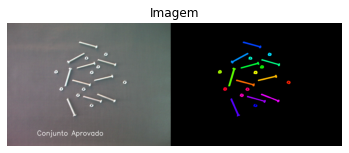

Conjunto Aprovado


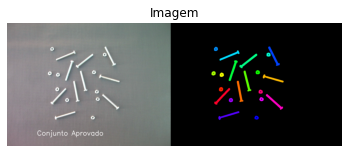

Conjunto Aprovado


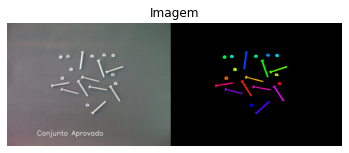

Faltam 5 parafusos


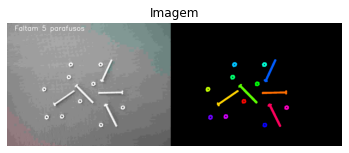

Faltam 1 parafusos
Faltam 1 porcas


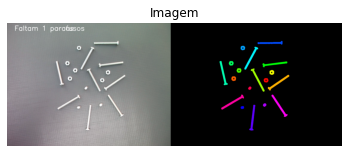

Conjunto Aprovado


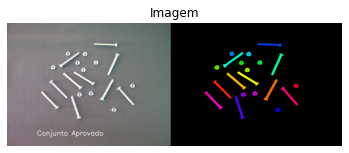

Faltam 3 parafusos


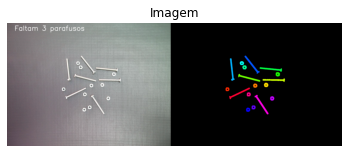

Conjunto Aprovado


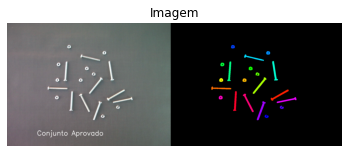

Faltam 1 porcas


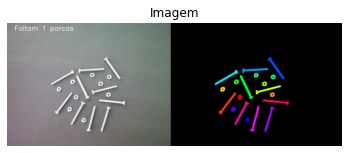

Faltam 10 porcas


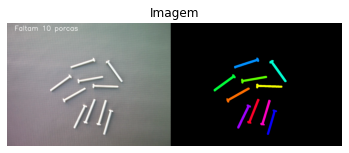

Conjunto Aprovado


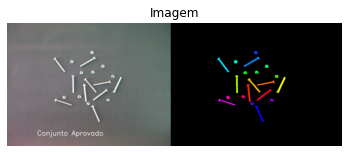

Faltam 3 parafusos
Faltam 3 porcas


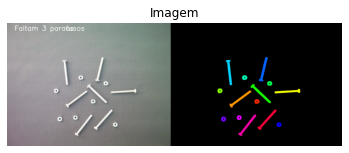

Conjunto Aprovado


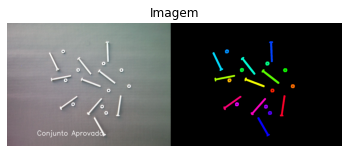

Faltam 3 parafusos
Faltam 1 porcas


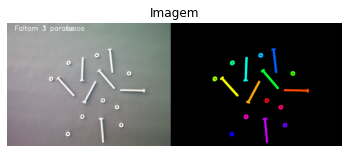

Conjunto Aprovado


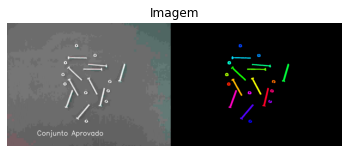

In [14]:
# Ler todas as imagnes na pasta e plotar
for fn in img_names:

    areas = list()

    # Imagem de entrada
    img = cv2.imread(fn, 1)

    # Separar os canais da imagens
    B, G, R = cv2.split(img)

    # Filtro bilateral e BLur - Redução de ruídos e melhora de bordas
    img_bil = cv2.bilateralFilter (G, 1, 90, 90)
    img_blur = cv2.blur(img_bil, (5,5))

    # Converter toos os pixels entre 1-195 para 0 e os outros para 1
    img_th = cv2.threshold(img_blur, 190, 255, cv2.THRESH_BINARY)[1]

    # Dilatar as imagens
    img_dilate = cv2.dilate(img_th, np.ones((4,4),np.uint8), iterations=1)

        # plt.figure(figsize=(16,8))

    # plt.subplot(2,3,1), plt.imshow(img, cmap = 'gray')
    # plt.title('Original')

    # plt.subplot(2,3,2), plt.imshow(G, cmap = 'gray')
    # plt.title('Green')

    # plt.subplot(2,3,3), plt.imshow(img_bil, cmap = 'gray')
    # plt.title('Filtro Bilateral')

    # plt.subplot(2,3,4), plt.imshow(img_blur, cmap='gray')
    # plt.title('Filtro Blur')

    # plt.subplot(2,3,5), plt.imshow(img_th, cmap='gray')
    # plt.title('Filtro Threshold')

    # plt.subplot(2,3,6), plt.imshow(img_dilate, cmap='gray')
    # plt.title('Filtro Dilatada')

    # plt.show()

    # Aplicar connectedComponents para detectar pixels conectados
    numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_dilate, 4, cv2.CV_8U)

    areas.append(stats)
    df_areas = pd.DataFrame(areas[0], columns = ['X','Y','W','H','AREA'])
    df_areas.drop(df_areas.index[0], inplace=True)
    parafusos = df_areas[df_areas['AREA'] > 900]
    porcas = df_areas[df_areas['AREA'] < 899]

    # Mapeie rótulos de componentes para valor de matiz, 0-179 é o intervalo de matiz no OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converter HSV -> BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # BG preto
    labeled_img[label_hue == 0] = 0

    qntd_elem = numLabels - 1

    flag = True

    if (len(parafusos) != 10):
        print(f'Faltam {abs(len(parafusos) - 10)} parafusos')
        cv2.putText(img, f'Faltam {abs(len(parafusos) - 10)} parafusos', (50, 50), font, 1.5, (255,255,255,255), 2, cv2.LINE_AA)
        flag = False

    if (len(porcas) != 10):
        print(f'Faltam {abs(len(porcas) - 10)} porcas')
        cv2.putText(img, f'Faltam {abs(len(porcas) - 10)} porcas', (50, 50), font, 1.5, (255,255,255,255), 2, cv2.LINE_AA)
        flag = False

    if flag == True:
        print('Conjunto Aprovado')
        cv2.putText(img, 'Conjunto Aprovado', (200, 750), font, 1.5, (255,255,255,255), 2, cv2.LINE_AA)

    img_concate = cv2.hconcat([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)])
    img_text = np.zeros((img_concate.shape[0], 50), dtype=np.uint8)
    imagem_total = cv2.hconcat([cv2.cvtColor(img_concate, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_text, cv2.COLOR_RGB2BGR)])

    plt.imshow(imagem_total)
    plt.axis('off')
    plt.title('Imagem')
    plt.show()